In [ ]:
# to do - add text content in markdown, integrate with existing ccf page on swdb 

# https://github.com/AllenSWDB/allenswdb.github.io/blob/main/databook/background/CCF.md

In [5]:
import brainglobe_atlasapi as atlasapi
from brainglobe_atlasapi import BrainGlobeAtlas


In [6]:
atlasapi.config.write_config_value('brainglobe_dir', '/data/.brainglobe') # points to allen mouse atlases pre-loaded in data folder 

atlas = BrainGlobeAtlas('allen_mouse_25um', check_latest = False) # load CCF mouse brain atlas, 25um resolution 

Let's go through a specific example. Starting with a coordinate in a CCF registered brain volume (this could be the location of a Neuropixels probe target or a cell feature in an anatomy dataset), we can use brainglobe_atlasapi to programmatically identify which brain region the coordinate is in. 



In [22]:
coordinate = [289, 153, 237]


atlas.structure_from_coords(coordinate, as_acronym=True)

'MD'

Note that this function will output the finest parcellation that the coordinate is in. Let's unpack what this means. 

Using the get_structure_descendants and get_structure_ancestors functions, we can look at the branches related to MD. 


In [31]:
atlas.get_structure_descendants("MD")

[]

MD has no descendants, indicating that this structure is at the end node of the hierarchy.  

In many cases, knowing the greater brain structure(s) that our coordinate is in is more helpful than the finest parcellation (e.g. thalamus ("TH" vs mediodorsal thalamus "MD" ). Let's look at the ancestors.  


In [28]:
atlas.get_structure_ancestors("MD")

['root', 'grey', 'BS', 'IB', 'TH', 'DORpm', 'MED']

'root' = entire brain 

'MED' = next closest node in the hierarchy 

We can visualize the brain structures by generating structure masks. For example, we'll create a 2D plot of the entire brain and mask out MD and DORpm, an overarching brain structure, as different shades of grey.

In [77]:
# generate masks to see how MD is embedded in an "ancestor" structure, e.g. DORpm

mask = atlas.get_structure_mask("MD")
mask2 = atlas.get_structure_mask("DORpm")

mask_root[mask_root>0]=5
mask[mask>0]=2
mask2[mask2>0]=3
mask_root = mask + mask2 + mask_root

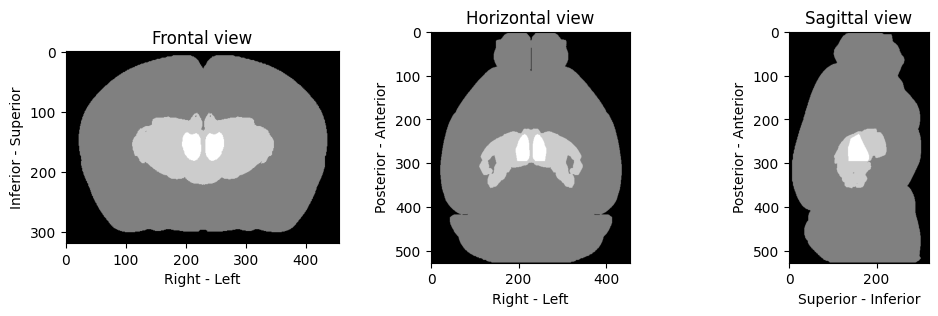

In [80]:
space = atlas.space
f, axs = plt.subplots(1,3, figsize=(12, 3))
for i, (plane, labels) in enumerate(zip(space.sections, space.axis_labels)):
    axs[i].imshow(mask_root.max(i), cmap="gray")
    axs[i].set_title(f"{plane.capitalize()} view")
    axs[i].set_ylabel(labels[0])
    axs[i].set_xlabel(labels[1])
